# Pytorch dataloaders for echocardiography

Miguel Xochicale [@mxochicale](https://github.com/mxochicale)  
Dec2021/Jan2022


## 1.1 Introduction
This notebook presents prototypes to pre-process echocardiography datasets with the use of pytorch features. 

## 1.2 Running notebook

1. Go to echocardiography repository path: `$HOME/repositories/echocardiography/`
2. Open echocardiography repo in pycharm and in the terminal type:
    ```
    git checkout master # or the branch
    git pull # to bring a local branch up-to-date with its remote version
    ```
3. Launch Notebook server
    Go to you repository path: `cd $HOME/repositories/echocardiography/scripts/` and type in the pycharm terminal:
    ```
    conda activate rt-ai-echo-VE 
    jupyter notebook
    ```
    which will open your web-browser.
    
    
## 1.3 References
* 



## 2. Jupyter Notebook

### 2.1 Setting imports and datasets paths

In [1]:
import os
import sys
import argparse
import yaml
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from torch.utils.data import DataLoader
from torchvision import transforms, utils

from source.dataloaders.EchocardiographicVideoDataset import EchoVideoDataset, ViewVideoDataset

HOME_PATH = os.path.expanduser(f'~')
CONFIG_FILES_PATH= 'repositories/echocardiography/scripts/config_files'
YML_FILE = os.path.join(HOME_PATH, CONFIG_FILES_PATH, 'config_echodatasets.yml')

    
with open(YML_FILE, 'r') as yml:
    config = yaml.load(yml, Loader=yaml.FullLoader)

### 2.2 Setting variables and loading datasets using pytorch dataloader

In [2]:

dataset = ViewVideoDataset(config['participants_videos_path'])

video_index = 77 #77: /01NVb-003-072-1-echo.mp4
#video_index = 78 #78: /01NVb-003-072-2-echo-cont.mp4
#video_index = 79 #79: /01NVb-003-072/T3/01NVb-003-072-3-echo.mp4

data = dataset[video_index]

print(f' {type(data)}, {data.size()} ')



/home/mx19/datasets/vital-us/echocardiography/videos-echo/01NVb-003-072/T1/01NVb-003-072-1-echo.mp4
  
  
  
  VIDEO_FEATURES
    video_name=/home/mx19/datasets/vital-us/echocardiography/videos-echo/01NVb-003-072/T1/01NVb-003-072-1-echo.mp4
    Frame_height=1080, frame_width=1920 fps=30 nframes=23285 
  
  


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 499/499 [00:02<00:00, 190.60it/s]


 <class 'torch.Tensor'>, torch.Size([499, 1, 1080, 1920]) 


### 2.3 Using dataloader with pre-processing image techniques

 Number of batches: 499 
       Grid size torch.Size([3, 1080, 1920])


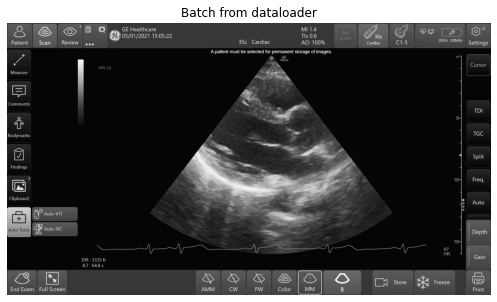

In [3]:
##Batch size is the number of frames for one clip and those frames can be set to suffle 

dataloader = DataLoader(data,
                    batch_size=1,
                    shuffle=False,
                    num_workers=0,
                    pin_memory=True
                    )

length_of_dl=len(dataloader)
print(f' Number of batches: {length_of_dl} ')


for i_batch, sample_batched in enumerate(dataloader):
#     print(f'       batch_index: {i_batch} batch_size: {sample_batched.size()}'  )

    # observe Xth batch and stop.
    if i_batch == 400:
        plt.figure(figsize =(20,5) )
        
        batch_size = len(sample_batched)
                
        plt.tight_layout()
        grid = utils.make_grid(sample_batched)
        print(f'       Grid size {grid.size()}' )
        plt.imshow(grid.numpy().transpose(1, 2, 0).astype('uint8'))
        plt.title('Batch from dataloader')
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

